In [6]:
import pandas as pd
from tabulate import tabulate
from sklearn.preprocessing import StandardScaler
import os

# Path to the CSV file
file_path = 'bank-full.csv'

# Checking if the file exists
if os.path.exists(file_path):
    print("File found. Loading data...")
    df = pd.read_csv(file_path, sep=';', quotechar='"')
    print("Data loaded successfully!")
else:
    print("File not found at the specified path.")
    print("Please make sure the file exists and the path is correct.")

# Get the count of rows in the DataFrame
num_rows = len(df)
print()
print(f"{num_rows} rows of data are available. Previewing prices of the first 50 rows:")

# Displaying the first 50 rows of the DataFrame in a tabular format
print(tabulate(df.head(50), headers='keys', tablefmt='pretty'))


File found. Loading data...
Data loaded successfully!

45211 rows of data are available. Previewing prices of the first 50 rows:
+----+-----+---------------+----------+-----------+---------+---------+---------+------+---------+-----+-------+----------+----------+-------+----------+----------+----+
|    | age |      job      | marital  | education | default | balance | housing | loan | contact | day | month | duration | campaign | pdays | previous | poutcome | y  |
+----+-----+---------------+----------+-----------+---------+---------+---------+------+---------+-----+-------+----------+----------+-------+----------+----------+----+
| 0  | 58  |  management   | married  | tertiary  |   no    |  2143   |   yes   |  no  | unknown |  5  |  may  |   261    |    1     |  -1   |    0     | unknown  | no |
| 1  | 44  |  technician   |  single  | secondary |   no    |   29    |   yes   |  no  | unknown |  5  |  may  |   151    |    1     |  -1   |    0     | unknown  | no |
| 2  | 33  | entrepre

## Preprocessing

In [7]:
# 1. Handle Missing Values
# Check for missing values in each column
missing_values = df.isnull().sum()

# Display columns with missing values and the number of missing values
missing_columns = missing_values[missing_values > 0]
if missing_columns.empty:
    print("No missing values in any column.")
else:
    print("Columns with Missing Values:")
    for col, missing_count in missing_columns.items():
        print(f"{col}: {missing_count} missing values")


No missing values in any column.


In [8]:
# 2. Data Cleaning
# Check for duplicate rows
duplicate_rows = df[df.duplicated()]

# Display and remove duplicate rows
if not duplicate_rows.empty:
    print("Duplicate Rows:")
    print(duplicate_rows)
    df = df.drop_duplicates()
    print("Duplicate rows removed.")
else:
    print("No duplicate rows found.")

No duplicate rows found.


In [9]:
# 3. Data Transformation
# Flag to check if any binary columns are found
found_binary_cols = False

# Convert binary categorical columns to numerical values and provide meaningful prints
for col in df.columns:
    if df[col].dtype == 'object' and df[col].nunique() == 2 and set(df[col].unique()) == {'no', 'yes'}:
        df[col] = df[col].map({'no': 0, 'yes': 1})
        print(f"Binary categorical column '{col}' successfully encoded.")
        found_binary_cols = True

# If no binary categorical columns are found, print a message
if not found_binary_cols:
    print("No binary categorical columns found for encoding.")


Binary categorical column 'default' successfully encoded.
Binary categorical column 'housing' successfully encoded.
Binary categorical column 'loan' successfully encoded.
Binary categorical column 'y' successfully encoded.


In [10]:
# 4. Feature Engineering
# Identify categorical columns with up to 10 unique values
categorical_columns = [col for col in df.columns if df[col].dtype == 'object' and df[col].nunique() <= 12]

# Check if there are any categorical columns with up to 12 unique values
if categorical_columns:
    # Encode categorical variables using one-hot encoding for columns with up to 12 unique values
    df = pd.get_dummies(df, columns=categorical_columns)
    
    # Print messages for successfully encoded columns
    for col in categorical_columns:
        print(f"Nominal categorical column '{col}' successfully encoded.")
    
    # Convert boolean columns to integers
    for col in df.columns:
        if df[col].nunique() == 2 and df[col].dtype == bool:
            df[col] = df[col].astype(int)
else:
    print("No categorical columns with up to 12 unique values found.")

Nominal categorical column 'job' successfully encoded.
Nominal categorical column 'marital' successfully encoded.
Nominal categorical column 'education' successfully encoded.
Nominal categorical column 'contact' successfully encoded.
Nominal categorical column 'month' successfully encoded.
Nominal categorical column 'poutcome' successfully encoded.


In [11]:
# 5. Data Scaling
# Initialize the MinMaxScaler
scaler = StandardScaler()

# Select the numerical columns that need to be scaled
numerical_columns = ['age', 'balance', 'duration']

# Apply Min-Max scaling to the selected numerical columns
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])
print("Age, balance, and duration columns scaled using standard scaling.")

Age, balance, and duration columns scaled using standard scaling.


## Training Model

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Exclude the specified columns from the DataFrame
X = df.drop(columns=['y'])

# Target variable
y = df['y']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Instantiate the Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42, n_estimators=500)

# Fit the model to the training data
rf_classifier.fit(X_train, y_train)

# Predict on the test data
y_pred = rf_classifier.predict(X_test)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9057062813329402


## Feature Importances

In [13]:
# Get feature importances
importances = rf_classifier.feature_importances_

# Print the importance of each feature
for feature, importance in zip(X, importances):
    print(f"{feature}: {importance}")

age: 0.09453979850440129
default: 0.0020076059963673996
balance: 0.09395813307161047
housing: 0.022833409735661253
loan: 0.00959095996970721
day: 0.08224128375117234
duration: 0.2624259471877268
campaign: 0.03912925499495243
pdays: 0.0398209637149569
previous: 0.02086942009715851
job_admin.: 0.009185989330491705
job_blue-collar: 0.008562194896292405
job_entrepreneur: 0.003564648203812384
job_housemaid: 0.0031287691503338404
job_management: 0.010325664674115217
job_retired: 0.005222049794120534
job_self-employed: 0.004601850346155823
job_services: 0.006390510516194877
job_student: 0.004376826738408089
job_technician: 0.010608159219854148
job_unemployed: 0.004440737048139379
job_unknown: 0.001334790656382933
marital_divorced: 0.0072079343149096305
marital_married: 0.010560001728273281
marital_single: 0.009424503908837827
education_primary: 0.006889951257592927
education_secondary: 0.011736410496894143
education_tertiary: 0.011069220572531664
education_unknown: 0.005124747863091269
contac

## Evaluate

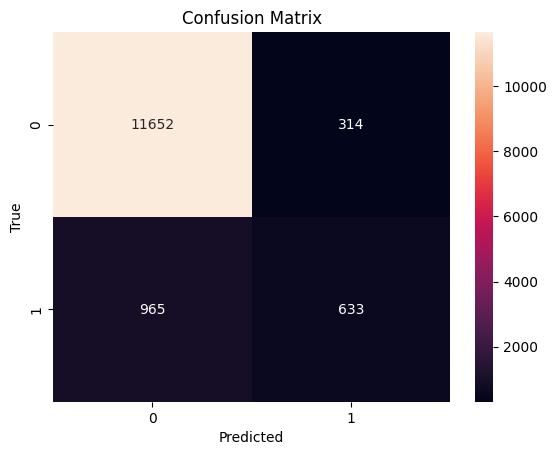

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix as a heatmap
sns.heatmap(cm, annot=True, fmt="d")

# Set labels and title
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')

# Display the plot
plt.show()

In [15]:
from sklearn.metrics import classification_report

# Generate and print the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.97      0.95     11966
           1       0.67      0.40      0.50      1598

    accuracy                           0.91     13564
   macro avg       0.80      0.68      0.72     13564
weighted avg       0.89      0.91      0.89     13564

